In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import optimize
import pandas as pd

In [2]:
def get_dict(X):
    value_freq_dict = {}
    for x in X:
        if x in value_freq_dict.keys():
            value_freq_dict[x][0]+=1
        else:
            value_freq_dict[x]=[]
            value_freq_dict[x].append(1)
    for x in value_freq_dict.keys():
        value_freq_dict[x].append(value_freq_dict[x][0]/len(X))
    return value_freq_dict

In [3]:
def get_mean(X_dict):
    mean = 0
    for x in X_dict.keys():
        mean += x*X_dict[x][1]
    return round(mean, 3)

In [4]:
def get_median(X):
    X_var_series = sorted(X)
    n = len(X)
    if n%2==0:
        k = int(n/2)
        return round((X_var_series[k-1]+X_var_series[k+1-1])/2,3)
    else:
        k = int((n-1)/2)
        return round(X_var_series[k],3)

In [5]:
def get_disp(X_dict, mean):
    disp = 0
    for x in X_dict.keys():
        disp+=(x-mean)**2*X_dict[x][1]
    return round(disp, 3)

In [ ]:
def quartile_1_4(time_series_X):
    n = len(time_series_X)
    if (n % 4==0):
        q_1_4 = (time_series_X[int(n/4)-1]+time_series_X[int(n/4)])/2
    else:
        q_1_4 = time_series_X[int(n/4)+1-1]
    return round(q_1_4,3)

In [ ]:
def quartile_3_4(time_series_X):
  n = len(time_series_X)
  if (n % 4==0):
    q_3_4 = (time_series_X[int(3*n/4)-1]+time_series_X[int(3*n/4)])/2
  else:
    q_3_4 = time_series_X[n-int(n/4)-1]
  return round(q_3_4,3)

In [ ]:
def get_mode(X_dict):
    mode = max(X_dict, key=X_dict.get)
    return mode

In [ ]:
def get_moment(X_dict, X_mean, n):
  n_moment = 0
  for x in X_dict.keys():
    n_moment += (x-X_mean)**n*X_dict[x][1]
  return n_moment

In [ ]:
def get_skewness(X_dict, X_mean):
  X_third_moment = get_moment(X_dict, X_mean, 3)
  X_std = get_disp(X_dict, X_mean)**0.5
  return round(X_third_moment/X_std**3,3)

In [6]:
X_48 = []
with open('ZII_48.csv') as f:
    for line in f:
        if line[4]==',':
            X_48.append(float(line[:3]))
        else:
            X_48.append(float(line[:5]))
len(X_48)

89

In [7]:
X_0 = 114.75
delta = 1
mu_low_border_p = 91
disp_high_border_p = 91
med_two_side_border_p = 90
p_low_border_p = 99
quality_norm_p = 118.6

In [8]:
X_48_dict = get_dict(X_48)
X_48_time_series = sorted(X_48)
X_48_mean = get_mean(X_48_dict)
X_48_median = get_median(X_48)
X_48_disp = get_disp(X_48_dict, X_48_mean)
X_48_std = round(X_48_disp**0.5,3)

print('X_48_mean: ',X_48_mean)
print('X_48_median: ',X_48_median)
print('X_48_disp: ',X_48_disp)
print('X_48_std: ',X_48_std)


X_48_mean:  120.891
X_48_median:  121.0
X_48_disp:  5.067
X_48_std:  2.251


In [9]:
n = len(X_48)
X_48_disp_no_bias=round(X_48_disp*n/(n-1),3)

In [10]:
X_48_std_no_bias=round((X_48_disp*n/(n-1))**0.5,3)
X_48_std_no_bias

2.264

In [11]:
p_118_6 = sum([1 for x in X_48 if x>118.6])/n
p_118_6

0.8651685393258427

In [12]:
def prob_greater_that(sample, value):
  n = len(sample)
  return sum([1 for x in sample if x>value]),sum([1 for x in sample if x>value])/n

In [13]:
prob_greater_that(X_48, 118.6)

(77, 0.8651685393258427)

In [14]:
def get_groupped_prob(sample_mean, value, sample_std):
    return round(stats.norm.cdf((sample_mean-value)/sample_std),3)

In [15]:
get_groupped_prob(X_48_mean, 118.6, X_48_std_no_bias)

0.844

In [16]:
X_0 = 114.75
delta = 1
r = 15
intervals_48 = [X_0 + i*delta for i in range(r)]
intervals_48_count = []
intervals_48_count.append(sum([x<=intervals_48[0] for x in sorted(X_48)]))
for i in range(1, r):
    intervals_48_count.append(sum([intervals_48[i-1]<x<=intervals_48[i] for x in sorted(X_48)]))
intervals_48_count

[0, 1, 1, 5, 5, 13, 19, 17, 14, 4, 4, 4, 0, 2, 0]

In [17]:
sum(intervals_48_count)

89

In [18]:
m = X_48_disp_no_bias/n**0.5
t_88_0_09 = stats.t.ppf(0.91, 88)
mu_low_border = X_48_mean - m*t_88_0_09
mu_low_border

120.15680018676582

In [19]:
t_88_0_09 

1.3514979873581943

In [20]:
hist_interval_means = [X_0+delta/2+delta*i for i in range(0,r-1)]
hist_interval_means

[115.25,
 116.25,
 117.25,
 118.25,
 119.25,
 120.25,
 121.25,
 122.25,
 123.25,
 124.25,
 125.25,
 126.25,
 127.25,
 128.25]

In [22]:
len(hist_interval_means)

14

In [23]:
prob_greater_that(X_48, 127)

(1, 0.011235955056179775)

In [24]:
max(X_48)

127.5

In [85]:
intervals_48_count

[0, 1, 1, 5, 5, 13, 19, 17, 14, 4, 4, 4, 0, 2, 0]

In [26]:
(1*115.25+1*116.25+5*117.25+5*118.25+13*119.25+19*120.25+17*121.25+14*122.25+4*123.25+4*124.25+4*125.25+0*126.25+2*127.25+0*128.25)/n

120.92415730337079

In [27]:
def get_groupped_mean(intervals_count, hist_interval_means):
  intervals_count = intervals_count[1:]
  n=sum(intervals_count)
  return round(sum([i*x for i,x in zip(intervals_count, hist_interval_means)])/n,3)

In [28]:
X_48_groupped_mean = get_groupped_mean(intervals_48_count, hist_interval_means)

In [30]:
def get_groupped_disp(intervals_count, hist_interval_means, groupped_mean):
  intervals_count = intervals_count[1:]
  n=sum(intervals_count)
  first_term = sum([v_j*x_j_mean**2 for v_j, x_j_mean in zip(intervals_count, hist_interval_means)])/n
  return round(first_term - groupped_mean**2, 3)

In [31]:
X_48_groupped_disp = get_groupped_disp(intervals_48_count, hist_interval_means, X_48_groupped_mean)
X_48_groupped_disp

5.089

In [32]:
X_48_groupped_std = round(X_48_groupped_disp**0.5, 3)
X_48_groupped_std

2.256

# Доверительный интервал для среднего

In [33]:
def get_mean_conf_interval(mean, std, n, alpha, mode):
  m = std/n**0.5
  if mode == 'two-side':
    t = stats.t.ppf(1-alpha/2, n-1)
    res = (round(mean-m*t,3), round(mean+m*t,3)),round(t,3)
  elif mode == 'low':
    t = stats.t.ppf(alpha, n-1)
    res = (round(mean-t*m,3),+np.inf),round(t,3)
  elif mode == 'high':
    t = stats.t.ppf(alpha, n-1)
    res = (-np.inf, round(mean+t*m)),round(t,3)
  else:
    res='Unknown mode'
  return res

In [34]:
mean_conf_interaval = get_mean_conf_interval(X_48_mean, X_48_disp_no_bias, n, mu_low_border_p/100, 'low')
mean_conf_interaval

((120.157, inf), 1.351)

In [35]:
m = round(X_48_std_no_bias/n**0.5, 3)
m

0.24

# Доверительный интервал для дисперсии

In [36]:
def get_disp_conf_interval(disp, n, alpha, mode):
  if mode == 'two-side':
    chi_low = stats.chi2.ppf(alpha/2, n-1)
    chi_high = stats.chi2.ppf(1-alpha/2, n-1)
    res = ((n-1)*disp/chi_low, (n-1)*disp/chi_high)
  elif mode == 'low':
    chi_low = stats.chi2.ppf(alpha, n-1)
    res = ((n-1)*disp/chi_low, +np.inf)
  elif mode == 'high':
    chi_high = stats.chi2.ppf(1-alpha, n-1)
    res = (0, (n-1)*disp/chi_high)
  else:
    res = 'Unknown mode'
  return res

In [37]:
disp_conf_interval =get_disp_conf_interval(X_48_disp_no_bias, n, disp_high_border_p/100, mode='high')
disp_conf_interval

(0, 6.369816164787568)

Константа, участвующая в построении доверительного интервала для дисперсии

In [38]:
stats.chi2.ppf(0.91,88)

106.26011363132523

In [ ]:
Правая граница интервала для стандартного отклонения

In [39]:
disp_conf_interval[1]**0.5

2.5238494734804546

In [42]:
def factorial(n):
  if n == 1 or n == 0:
    return 1
  else:
    return n*factorial(n-1)

In [43]:
def combination_number(n,k):
  enum = factorial(n)
  denum_1 = factorial(k)
  denum = denum_1*factorial(n-k)
  return enum/denum

# Доверительный интервал для медианы

In [ ]:
k

In [40]:
def get_median_conf_interval_1(n, alpha):
  for s in range(1, int(n/2)):
    value_s = sum([combination_number(n,j) for j in range(s, n-s+1)])/(2<<(n-1))>=(1-alpha)
    if value_s:
      k = s
  return k

In [45]:
k_1 = get_median_conf_interval_1(n, med_two_side_border_p/100)
k_1

43

In [46]:
def get_median_conf_interval_2(n, alpha):
  for s in range(0, int(n/2)):
    value = (stats.binom(n,0.5).cdf(n-s+1) -stats.binom(n,0.5).cdf(s))>= 1 - alpha
    if value:
      k = s
  return k

In [47]:
k_2 = get_median_conf_interval_2(n, med_two_side_border_p/100)
k_2

43

In [48]:
k = 43

In [49]:
med_conf_interval = (X_48_time_series[k-1], X_48_time_series[n-k+1-1])
med_conf_interval

(120.6, 121.0)

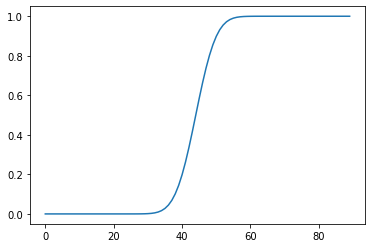

In [50]:
y =[stats.binom(n,0.5).cdf(i) for i in range(90)]
plt.plot([i for i in range(90)], y)

In [51]:
v = prob_greater_that(X_48, 118.6)[0]

# Точные доверительные интервалы для истинной вероятности

In [52]:
def get_prob_low_border(n, v, alpha):
    f = lambda p: stats.binom(n,p).cdf(v)-(alpha/100)
    return(round(optimize.bisect(f, 0,10000),3))

In [53]:
def get_prob_high_border(n, v, alpha):
    f = lambda p: stats.binom(n,p).cdf(v+1)-(1-alpha/100)
    return(round(optimize.bisect(f, 0,10000),3))

In [54]:
p_low_border = get_prob_low_border(n, v, p_low_border_p)
p_low_border

0.773

# Асимптотический доверительный интервал для истинной вероятности

In [55]:
def get_asympt_prob_interval(n,p, alpha):
    q = stats.norm.ppf(alpha/100)
    m = ((p*(1-p)/n)+(q/(2*n))**2)**0.5
    term = q**2/(n+q**2)*(p-0.5)
    return((round(p-m*q-term,3), round(p+m*q-term,3)), round(q,3), round(m,3))

In [56]:
p_asympt_interval = get_asympt_prob_interval(n, v/n, p_low_border_p)
p_asympt_interval

((0.755, 0.934), 2.326, 0.038)

# Эмпирическая функция распределения (ЭФР)

In [70]:
X_48_time_series_twised = sorted(X_48_time_series+X_48_time_series)

In [59]:
X_48_time_series[0]

115.2

In [72]:
#Добавляем меньшее всех(но не на много) значение к набору данных
X_48_time_series_twised = X_48_time_series_twised[-1::-1]+[115.0]
X_48_time_series_twised = X_48_time_series_twised[-1::-1]
#Добавляем большее(но не слишком) всех значение к набору данных
X_48_time_series_twised = X_48_time_series_twised + [127.7]

In [86]:
X_48_cdf = sorted([i/n for i in range(n)] + [i/n for i in range(1,n+1)])
#Добавляем 0 и 1 к значениям функции распределения:
X_48_cdf = X_48_cdf+[1.0]
X_48_cdf = X_48_cdf[-1::-1] + [0.0]
X_48_cdf = X_48_cdf[-1::-1]

In [88]:
len(X_48_cdf)

180

In [89]:
len(X_48_time_series_twised)

180

In [90]:
x = np.linspace(115,128,1000)
y_cdf = [stats.norm(X_48_mean,X_48_std).cdf(u) for u in x]

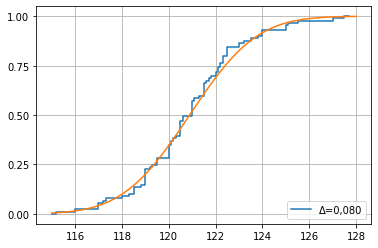

In [74]:
plt.plot(X_48_time_series_twised, X_48_cdf)
plt.plot(x,y_cdf)
plt.yticks([0,0.25,0.5,0.75,1])
plt.grid()
plt.legend(["Δ=0,080"], loc='lower right')

In [83]:
intervals_48_count

[0, 1, 1, 5, 5, 13, 19, 17, 14, 4, 4, 4, 0, 2, 0]

In [95]:
y_pdf = [stats.norm(X_48_mean, X_48_std).pdf(u) for u in x]
intervals_48_count_freq = [i/n for i in intervals_48_count]

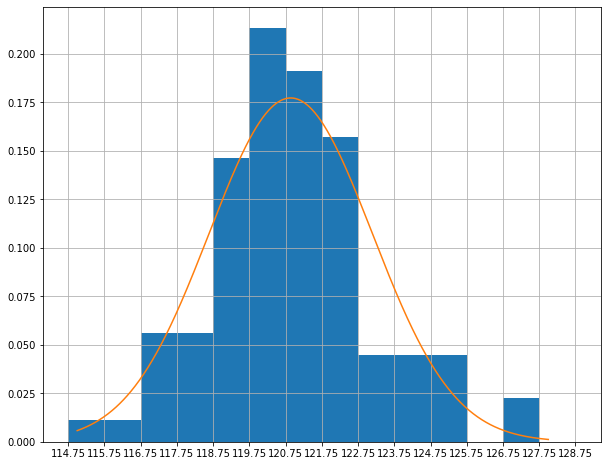

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
#hbar = ax.barh(intervals, height=intervals_count,width=1)
#plt.bar(intervals_48, height=intervals_48_count_freq,width=0.5,bins=intervals_48);
#plt.plot(x, y_pdf, color='r')
plt.hist(intervals_48[:-1], weights=intervals_48_count_freq[1:],bins=intervals_48);
plt.xticks(intervals_48);
plt.plot(x,y_pdf)
plt.grid()

In [93]:
y_cdf_norm = [stats.norm(X_48_mean, X_48_std).cdf(u) for u in X_48_time_series_twised]

180

In [94]:
d = [abs(y_1-y_2) for y_1, y_2 in zip(X_48_cdf,y_cdf_norm)]
d_max = max(d)
d_max

0.08006497845052774